In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

In [2]:
#https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

## BLACK & WHITE

In [3]:
DATADIR = "./Datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

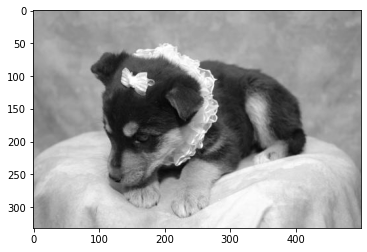

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(332, 500)


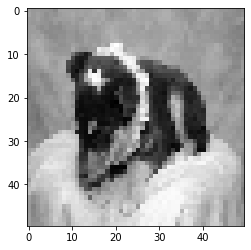

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [7]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()

In [8]:
print(len(training_data))

24946


In [9]:
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
1
0
1
1
0
0


In [11]:
X = []
y = []

In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)#Last 1 because gray scale

In [13]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

## COLOUR

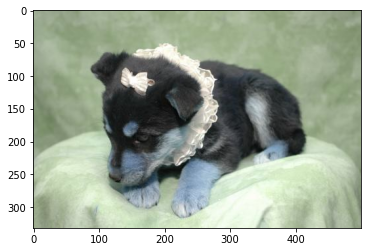

In [15]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [16]:
print(img_array.shape)

(332, 500, 3)


In [17]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()

In [18]:
print(len(training_data))

24946


In [20]:
random.shuffle(training_data)

In [21]:
X_colour = []
y_colour = []

In [23]:
for features, label in training_data:
    X_colour.append(features)
    y_colour.append(label)

X = np.array(X_colour).reshape(-1, IMG_SIZE, IMG_SIZE, 3)